## Ex 5.1: Plots of Summary Statistics and Relationships Among Variables

- **Objective**: Use visualization techniques to examine patterns and relationships in the WHR data.

- **Requires data files: `WHR2018Chapter2OnlineData.xls`**


- **Demonstrates**:
    - Using `pandas`, `seaborn's catplot and pairplot` functions to visualize patterns and relationships within the data.

---


We'll repeat here some of the code developed in a previous exercise so that we can continue to work with the data here. Execute the next few code cells to load and reconfigure the data.  In order to make the data a bit easier to work with, we are going to rename the column headers to be shorter, using the ```df.rename``` method.  For example, what is called "Life Ladder" in the original data, we will now refer to as "Happiness"; "Log GDP per capita" is renamed as "LogGDP", etc.

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format

In [6]:
dfraw = pd.read_excel('WHR2018Chapter2OnlineData.xls', sheet_name='Table2.1')

In [7]:
cols_to_include = ['country', 'year', 'Life Ladder', 
                   'Positive affect','Negative affect',
                   'Log GDP per capita', 'Social support',
                   'Healthy life expectancy at birth', 
                   'Freedom to make life choices', 
                   'Generosity', 'Perceptions of corruption']
renaming = {'Life Ladder': 'Happiness', 
            'Log GDP per capita': 'LogGDP', 
            'Social support': 'Support', 
            'Healthy life expectancy at birth': 'Life', 
            'Freedom to make life choices': 'Freedom', 
            'Perceptions of corruption': 'Corruption', 
            'Positive affect': 'Positive', 
            'Negative affect': 'Negative'}
df = dfraw[cols_to_include].rename(renaming, axis=1)
print(df.columns)

Index(['country', 'year', 'Happiness', 'Positive', 'Negative', 'LogGDP',
       'Support', 'Life', 'Freedom', 'Generosity', 'Corruption'],
      dtype='object')


### Step 1

Figure 1 in Appendix 1 of the WHR presents Country-by-Country trajectory plots of Happiness (Life Ladder) over time.  We can make a similar plot using some of the capabilities of the seaborn (sns) plotting package, which we have imported at the top of this notebook.

* Examine Figure 1 of [Appendix 1 of the 2018 World Happiness Report](https://s3.amazonaws.com/happiness-report/2018/Appendix1ofChapter2.pdf) in order to familiarize yourself with what you want to plot.
* You will use the ```catplot``` function in seaborn in order to plot the Happiness for each country as a function of year.  Read the [documentation](https://seaborn.pydata.org/generated/seaborn.catplot.html) for that function to see the different options.
* For your call to ```catplot```, the `x` and `y` arguments that you pass should be assigned to 'year' and 'Happiness': you want to assign 'year' to `x` and 'Happiness' to `y`.
* Less obvious from the catplot documentation is how to make a plot for each country separately. We want to make a grid of Happiness-versus-year plots.  The documentation notes that the 'row' and 'col' options can be used to indicate "categorical variables that will determine the faceting of the grid".  In our case, we want to use the country name in order to lay out the grid (i.e., to determine the faceting), and we want to proceed through the countries by laying them out in adjacent columns.  Therefore, we want to pass the option ```col='country'``` to catplot.
* Enter and evaluate a call to ```sns.catplot``` to make this group of plots, and assign the result of the operation to the variable ```plot```, since you will want to manipulate the plot further.  The following additional options to ```catplot``` might be useful to make the plot look something like what is in Figure 1 of Appendix 1:
<pre>
col_wrap=3, data=df, kind="bar", height=2.0, aspect=2.5, color='b', sharex=False, sharey=False
</pre>
* To make the catplot appear more like what is presented in Figure 1, enter and execute the following code to manipulate the ```plot``` variable that you stored, which will set the title of each plot to be the country name.
<pre>
plot.set_titles("{col_name}")
</pre>
* Please note that the plot will be rather long, since there are a lot of countries.

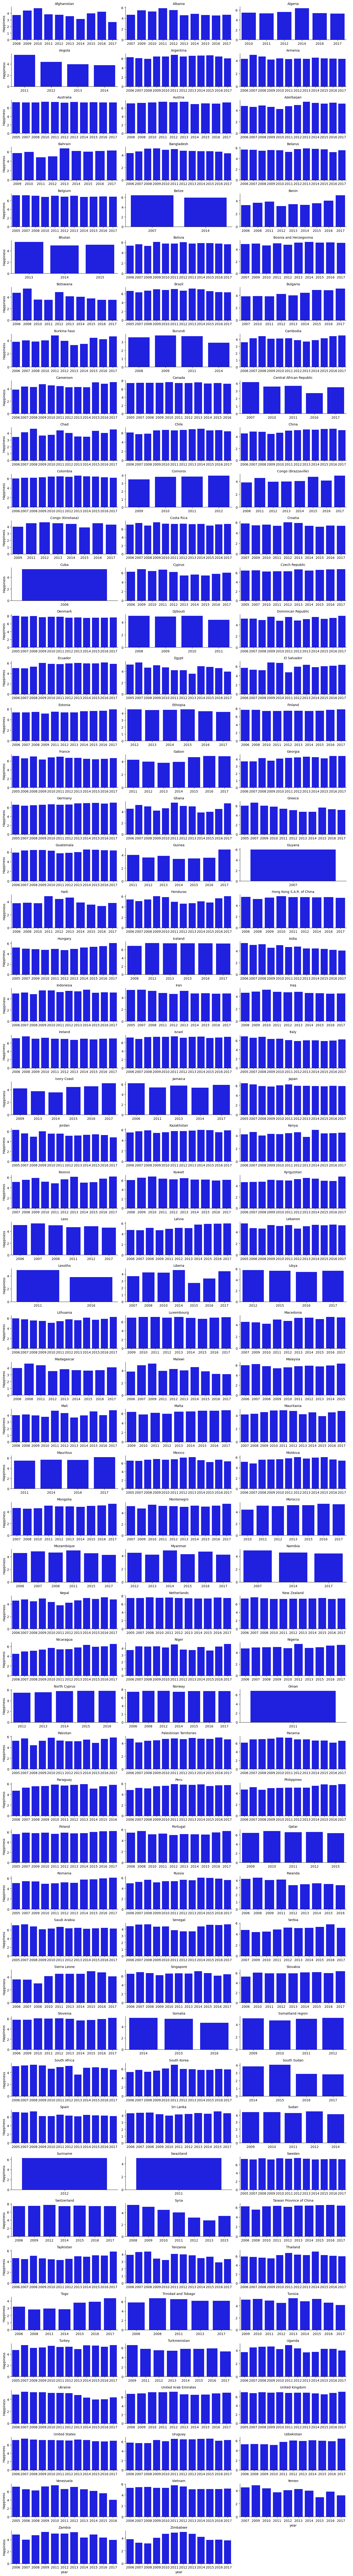

In [10]:
# Step 1
plot = sns.catplot(x='year', y='Happiness', col='country', col_wrap=3, data=df, kind="bar", height=2.0, aspect=2.5, color='b', sharex=False, sharey=False)
plot.set_titles("{col_name}")

### Step 2

In multivariate data sets (i.e., involving two or more variable quantities), it is often useful to get a perspective on how different parts of the data relate to one another.  A useful technique for visualizing all the pairwise relationships among variables is a grid of scatterplots for each pair of variables.  Seaborn provides a convenient function (```sns.pairplot```) for generating such a figure.

Examine the [documentation](https://seaborn.pydata.org/generated/seaborn.pairplot.html) for ```sns.pairplot``` to see what arguments are available.  The resulting plot will contain scatterplots on all the off-diagonal cells of the grid, and histograms or kernel density plots along the diagonals for each individual variable.

The World Happiness Report is interested in how a set of <i>explanatory variables</i> relate to Happiness; these explanatory variables are (in our new naming scheme): 'LogGDP', 'Support', 'Life', 'Freedom', 'Generosity', and 'Corruption'.  Therefore, we are most interested in the pairwise relationships among Happiness and these 6 explanatory variables.  By default, the pairplot function shows pairwise relationships among all columns in a dataframe, but we can restrict that to include just a subset of columns by passing in a list of column names with the ```vars``` option.  In our case, we will want to consider a ```vars``` list containing 7 items: Happiness plus the 6 explanatory variables. 

In the code cell below:

* Define a variable called ```explanatory_vars``` that contains the list of the 6 key explanatory variables.
* Define a variable called ```plot_vars``` that contains Happiness and each of the explanatory variables.  (Hint: recall that you can concatenate Python lists using the addition (```+```) operator.)
* Using ```sns.pairplot```, make a pairwise scatterplot for the WHR dataframe over the variables of interest, namely the ```plot_vars```.  To add additional information, set the ```hue``` argument to reflect the year of each data point, so that trends over time might become apparent.  It will also be useful to include the arguments ```dropna=True``` and ```palette='Blues'```.

<b>In doing plots like this, you might occasionally see some warning messages, even if the plot is generated correctly. These warning messages are often due to minor incompatibilities among the different layers of the ecosystem.  Here we are using seaborn to make a pairplot, which uses matplotlib under the covers to do the plotting.  Matplotlib, in turn, relies  on numpy and other packages.

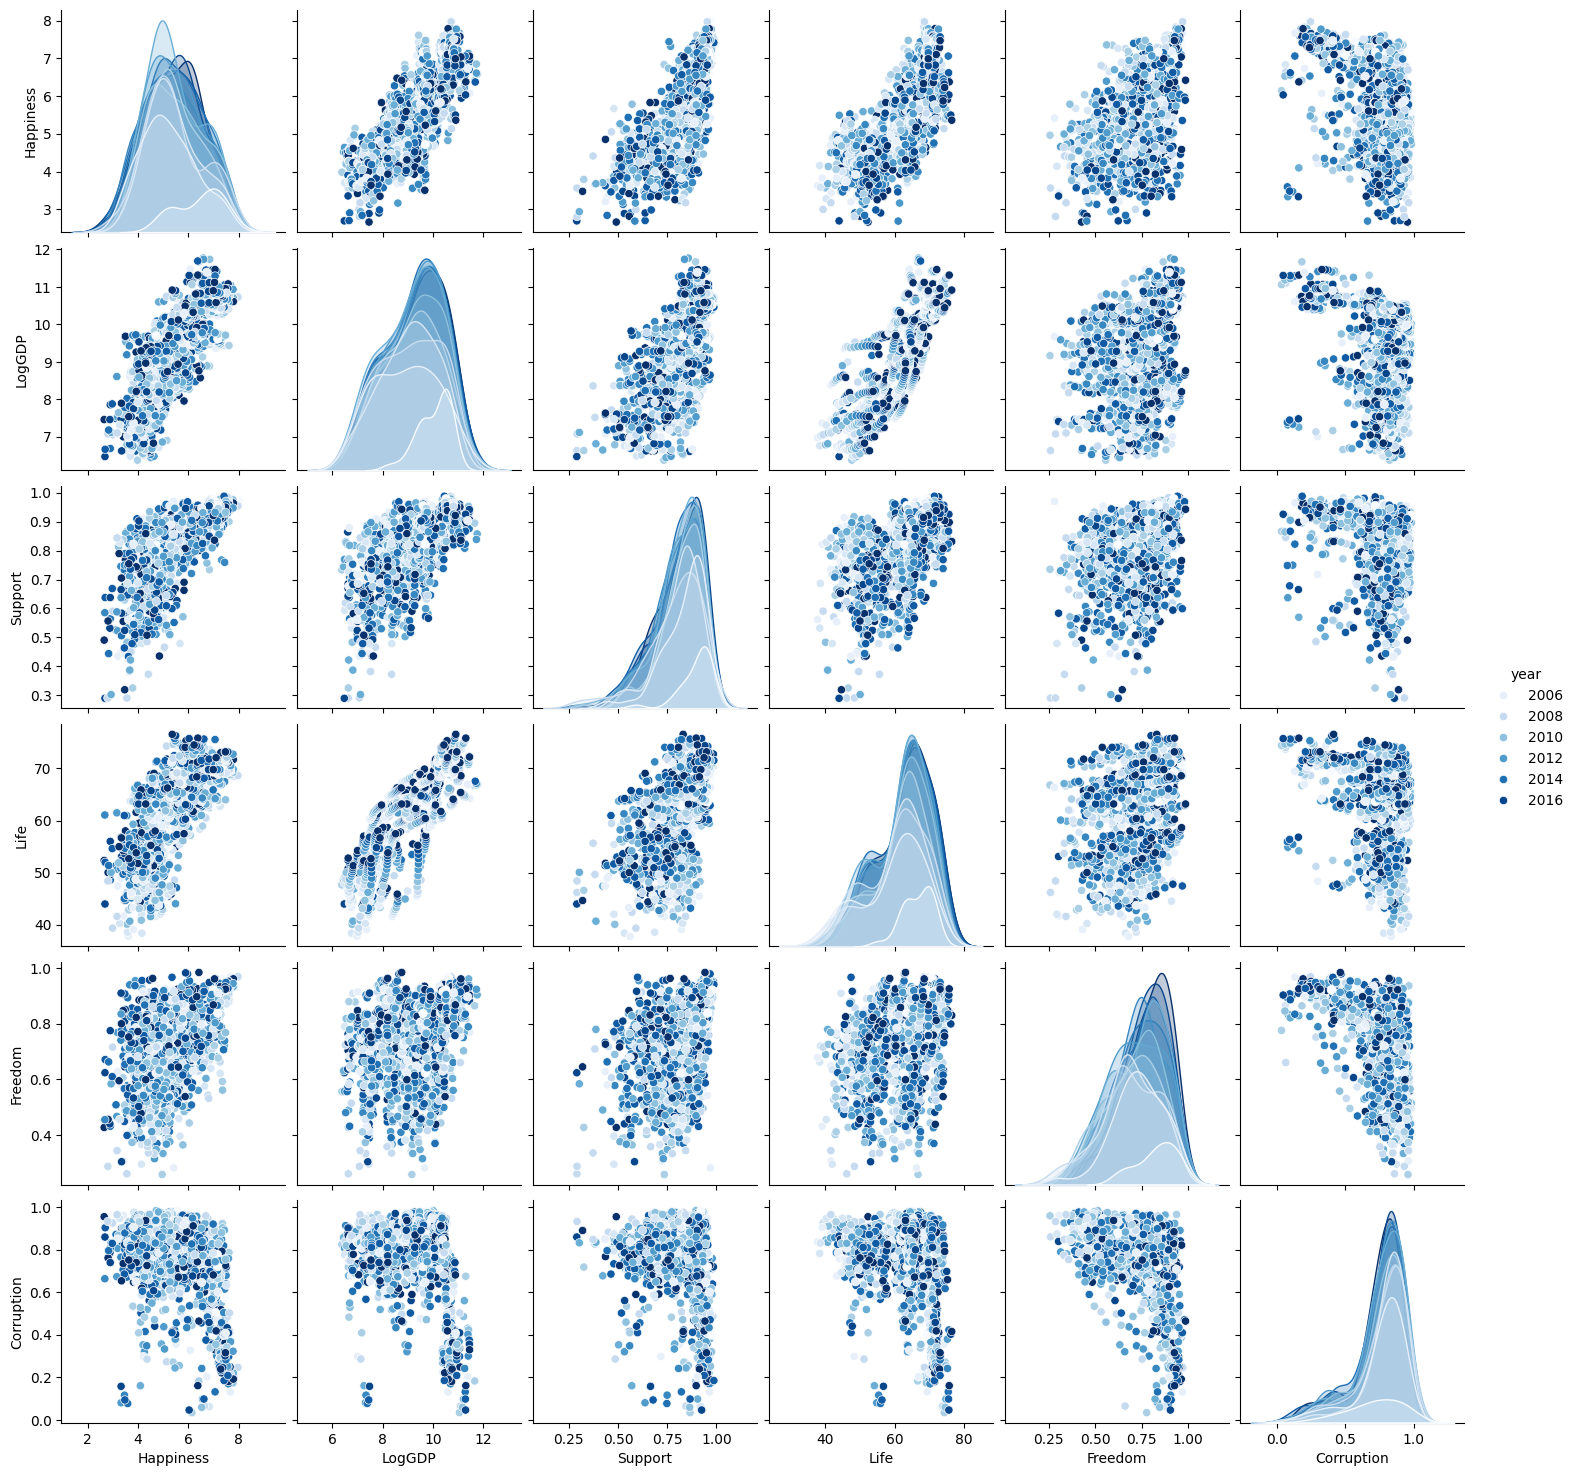

In [11]:
# Step 2
explanatory_vars = ['LogGDP', 'Support', 'Life', 'Freedom', 'Corruption']
plot_vars = ['Happiness'] + explanatory_vars
plot2 = sns.pairplot(df, vars=plot_vars, hue='year', dropna=True, palette='Blues')
plot2

By inspecting the scatterplots above, we can see that some variables (such as LogGDP, Support, and Life) show some positive correlation with Happiness, whereas other variables show little correlation.  The Corruption data appears to show something of a negative correlation with Happiness.